In [2]:
import numpy as np
import matplotlib.pyplot as plt

pi = np.pi
e  = np.e

## Lets first create a mesh and a function(slice of it since it is periodic) and observe it between 0 and T_0(period)

In [48]:
T_0 = 5
N   = 101

#x_values = np.linspace(0,T_0, N)
x_values = np.linspace(-T_0/2,T_0/2, N)
y_values = np.linspace(-T_0/2,T_0/2, N)

xx, yy = np.meshgrid(x_values, y_values)


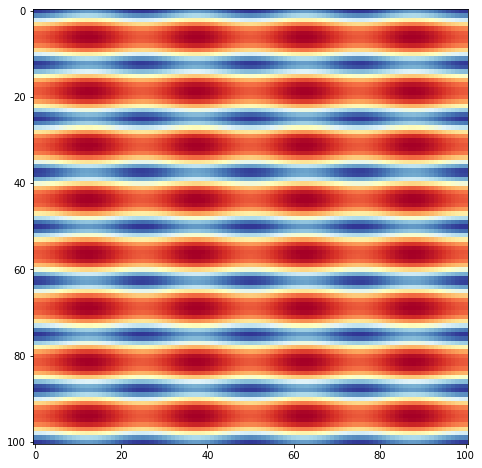

In [49]:
k  = np.array([0,1]) *20
k2 = np.array([1,0]) *5
k3 = np.array([0,-1])*10
#func = np.sin(k_unit[0]*xx+k_unit[1]*yy*-1)
func  = e**(1j * (k[0]*xx+k[1]*yy) ) + e**(1j * (k2[0]*xx+k2[1]*yy) ) + 5*e**(1j * (k3[0]*xx+k3[1]*yy) )

#Wavevector in 2d: Play with k
plt.figure(figsize=(8,8))
plt.subplot(1, 1, 1)
plt.imshow(func.real).set_cmap("RdYlBu")


In [50]:
from numpy.fft import fft2, fftshift, fftfreq
a,b =func.shape
FUNC = fft2(func) *(np.abs(x_values[0] - x_values[1]) *np.abs(y_values[0] - y_values[1])) 
FUNC_s= fftshift(FUNC)

<Figure size 864x864 with 0 Axes>

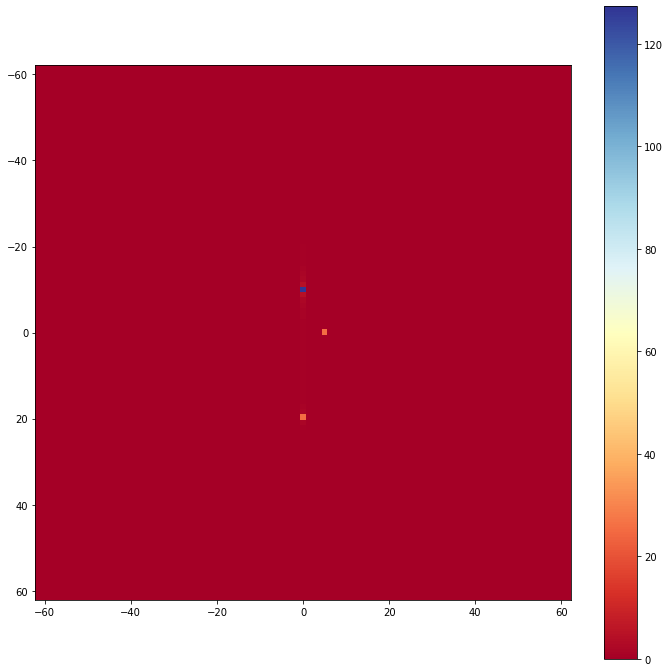

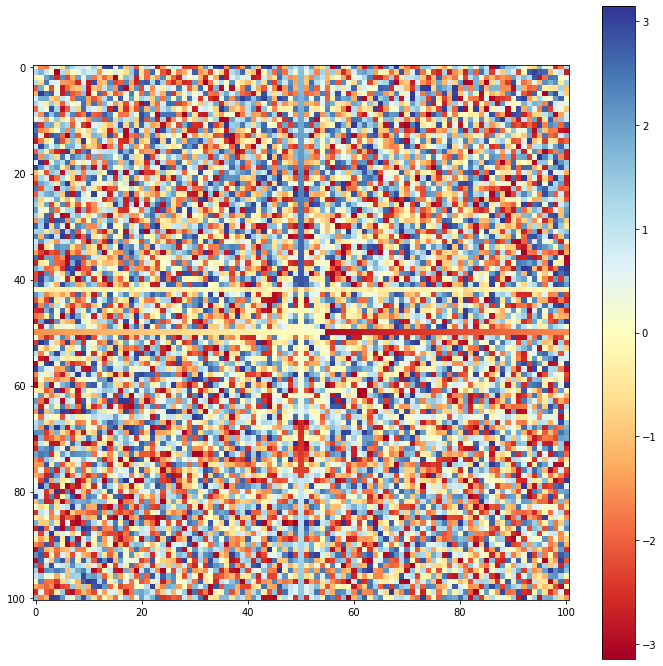

In [54]:
plt.figure(figsize=(12,12))
freq_x = fftfreq(N,d=np.abs(x_values[0] - x_values[1])) *2*pi
freq_y = fftfreq(N,d=np.abs(y_values[0] - y_values[1])) *2*pi
extent = [np.min(freq_x), np.max(freq_x), np.max(freq_y), np.min(freq_y)]

# FT of func
plt.figure(figsize=(12,12))
plt.imshow(np.abs(FUNC_s),extent=extent).set_cmap("RdYlBu")
plt.colorbar()
plt.figure(figsize=(12,12))
plt.imshow(np.angle(FUNC_s)).set_cmap("RdYlBu")
plt.colorbar()

## If you look at the points, you will see that they are the k values of our wavevectors. 

In [52]:
def analysis_func(direction,func, xx,yy,wlist=np.linspace(-60,61,num=500) ):
    direction_hat = direction / (direction**2).sum()**0.5
    X_real = np.zeros(len(wlist))
    X_imag = np.zeros(len(wlist))
    for c,w in enumerate(wlist):
        expo = e** (-1j * w * (direction_hat[0]*xx + direction_hat[1]*yy))        
        integrate  = func * expo
        integral_real = np.trapz(np.trapz(integrate.real, axis=1, dx = np.abs(xx[0][0] - xx[0][1])), dx = np.abs(yy[0][0] - yy[1][0]))
        integral_imag = np.trapz(np.trapz(integrate.imag, axis=1, dx = np.abs(xx[0][0] - xx[0][1])), dx = np.abs(yy[0][0] - yy[1][0]))
        X_real[c] = integral_real
        X_imag[c] = integral_imag
    X = X_real + 1j*X_imag    
    return X

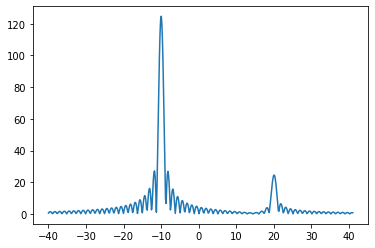

In [53]:
wlist=np.linspace(-40,41,num=500)
X = analysis_func(np.array([0,1]),func, xx,yy,wlist=wlist )
plt.plot(wlist,np.abs(X))